In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
#the top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
#the top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
#number of unique title codes

df['title'].nunique()

110

In [7]:
#Using .apply() with a custom lambda expression to create a new column called "reason" that contains this string value.

df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [8]:
#the most common Reason for a 911 call based off of the new column

df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

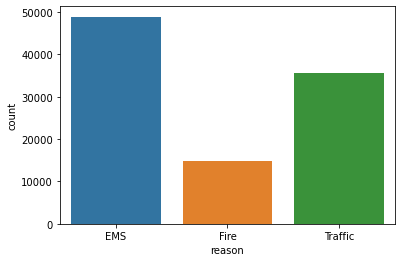

In [9]:
#using seaborn to create a countplot of 911 calls by reason

sns.countplot(x='reason', data=df)

In [10]:
#data type of the objects in the timeStamp column

type(df['timeStamp'].iloc[0])

str

In [11]:
#converting the column from strings to DateTime objects

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
#creating 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [13]:
#the Day of Week is an integer 0-6. Using the .map() with a dictionary to map the actual string names to the day of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['DayOfWeek'] = df['DayOfWeek'].map(dmap)
df['DayOfWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayOfWeek, Length: 99492, dtype: object

<AxesSubplot:xlabel='Month', ylabel='count'>

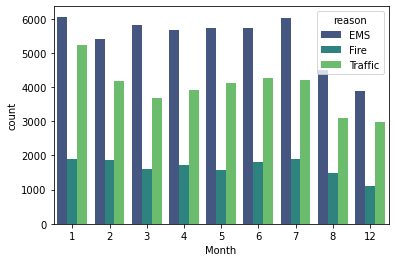

In [15]:
#using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

sns.countplot(x='Month',data=df,hue='reason',palette='viridis')

In [16]:
#grouping the DataFrame by the month column and use the count() method

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

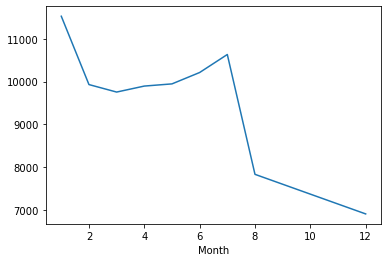

In [17]:
#creating a simple plot off of the dataframe indicating the count of calls per month

byMonth['zip'].plot()

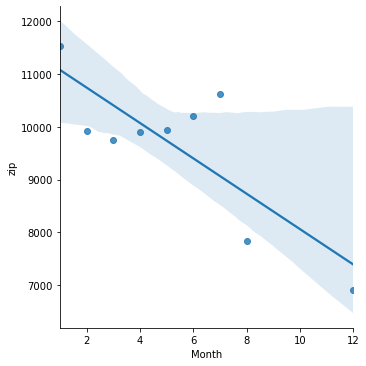

In [18]:
#using seaborn's lmplot() to create a linear fit on the number of calls per month

sns.lmplot(x='Month', y='zip', data=byMonth.reset_index())

Text(0.5, 1.0, 'Traffic')

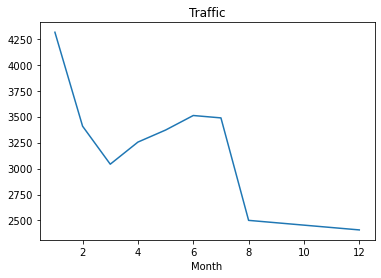

In [19]:
#creating a plot with the plot representing the Reason as Traffic for the 911 call

df[df['reason']=='Traffic'].groupby('Month').count()['zip'].plot()
plt.title('Traffic')

In [21]:
#restructuring the dataframe showing Hours as Columns and the Day of the Week as the Index

dayHour = df.groupby(by=['DayOfWeek', 'Hour']).count()['reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='DayOfWeek'>

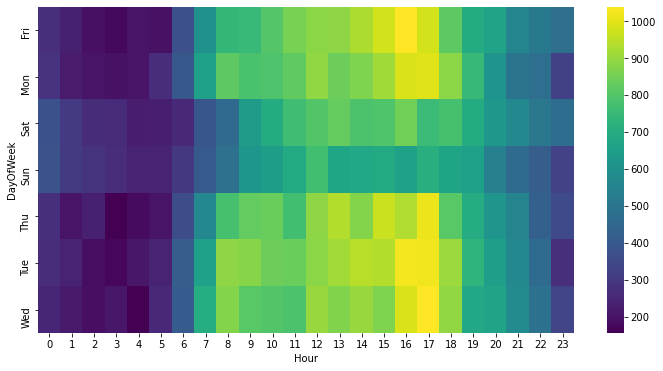

In [22]:
#creating a HeatMap

plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

<Figure size 864x432 with 0 Axes>

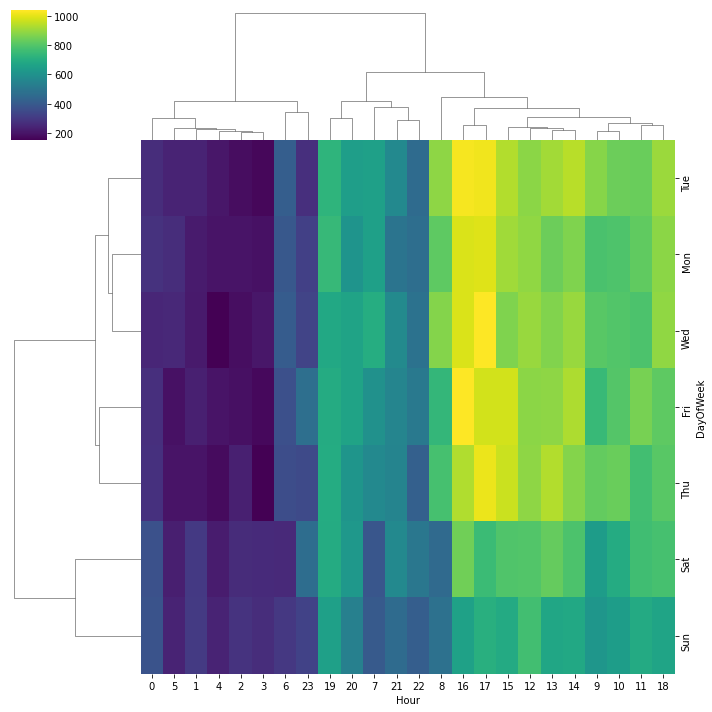

In [23]:
#Creating a clustermap

plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='viridis')